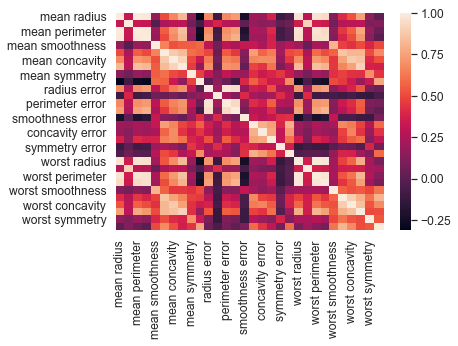

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1.1)

# Create a dataframe from data
dataset = load_breast_cancer()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names).dropna()
y = dataset.target

# I sum all the columns on X
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=.2)

# Check the independence between the independent variables
sns.heatmap(df.corr())
plt.show()

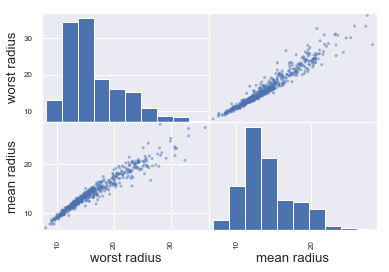

In [3]:
pd.plotting.scatter_matrix(df[['worst radius', 'mean radius']])
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(solver='liblinear')
regr.fit(X_train, y_train)

print('Accuracy on test set:', np.mean(cross_val_score(regr, X_test, y_test, cv=3)))
print('Accuracy on train set:', np.mean(cross_val_score(regr, X_train, y_train, cv=3)))

Accuracy on test set: 0.956140350877193
Accuracy on train set: 0.9406442430579761


### My version

In [20]:
# First, get the regression coefficents
coeffs = []

n = X_train.shape[0]

for i in range(X_train.shape[1]):
    p = n*(X_train[:, i]**2).sum() - X_train[:, i].sum()**2
    a = ( n*(X_train[:, i]*y_train).sum() - X_train[:, i].sum()*y_train.sum() ) / p
    b = ( y_train.sum()*(X_train[:, i]**2).sum() - X_train[:, i].sum()*(X_train[:, i]*y_train).sum() ) / p
    coeffs.append([a, b])

def predict(X_test):
    ret = 1 / ( 1 + np.exp(sum(-a*X_test[:, i] - b for i in range(X_test.shape[1]))) )
    ret[ret > .5] = 1
    ret[ret <= .5] = 0
    return ret